<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe3_Sub_arreglo_m%C3%A1ximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

**Entrada**: Arreglo númerico de tamaño *n*: $[a_1,a_2,...,a_n]$.

**Salida**: Suma del sub-arreglo máximo, e índices del sub-arreglo.

El problema del sub-arreglo máximo consiste en encontrar la suma más larga dentro de un arreglo *A*, "separando" estos elementos del arreglo, en un sub-arreglo contiguo al arreglo original.

![image](https://imgur.com/wsfCDkA.jpg)

![image](https://imgur.com/7EKTUgM.jpg)

Aunque este problema a primera vista no pareciera tener una aplicación del todo practica, definitivamente la tiene, ya que es sumamente necesaria a la hora de análisis de dato, como puede ser en las inteligencias artificiales que procesan imagenes, donde haciendo conversión de ciertos datos, se puede analizar que zonas de las imagenes es más brillante que otra, lo que puede generar un mapa de profundidad de la imagen.
Tambien llega a tener usos en la biologia como es en el analisis de secuencias de genomas.

#2. Algoritmo para el sub-arreglo máximo

El algoritmo busca la secuencía de elementos en un arreglo, de modo que la suma de estos sea mayor a cualquier otro sub-conjunto del arreglo.

>Ejemplo: $A = [-2, -1, -5, 5, -2, 3, -8, 3]$ la suma de todos los elementos de $A$ da $-7$, mientras que un sub-conjunto cualquiera como $[-8, 3]$ da $-5$ siendo mayor a la suma general, pero el máximo sub-arreglo sería $[5, -2, 3]$ ya que su suma da $6$ siendo la mayor suma que se puede sacar del arreglo original.

#3. Código

In [ ]:
import random
from termcolor import colored
import copy

def maxSubArrayMid(arr, mid, verbose = False):
	sumAux = 0
	maxIzq = -9999
	posInit = 0

	for i in range(mid-1, -1, -1): #Parte del medio al inicio del arreglo
		sumAux += arr[i]

		if(sumAux > maxIzq):
			maxIzq = sumAux
			posInit = i

	sumAux = 0
	maxDer = -99999
	posFin = len(arr)-1

	for i in range(mid, len(arr)):
		sumAux += arr[i]

		if sumAux > maxDer:
			maxDer = sumAux
			posFin = i
	
	max = maxIzq + maxDer
	if (verbose == True):
		if (len(arr[posInit:posFin]) > 1):
			print("Máximo sub-arreglo actual: ", f"{str(arr[posInit: posFin-1])[1:-1]}", ",", f"{str(arr[posFin-1: posFin])[1:-1]}")
		else:
			print("Máximo sub-arreglo actual: ", f"{str(arr[posInit: posFin])[1:-1]}", "\n")

	return max, posInit, posFin

def maxSubArray(arr, posInit, posFin, verbose = False):
	n = len(arr)
	
	if n == 1:
		return arr[0], posInit, posFin
	
	mid = n//2

	arrIzq = arr[:mid]
	arrDer = arr[mid:]

	if verbose == True:
		print("Sub-arreglo izquierdo: ", arrIzq)
		print(f"Sub-arreglo derecho: {arrDer} \n")
	
	maxIzq, initPosIzq, finPosIzq = maxSubArray(arrIzq, 0, mid-1, verbose)
	maxDer, initPosDer, finPosDer = maxSubArray(arrDer, mid, len(arr)-1, verbose)
	maxMid, initPosMid, finPosMid = maxSubArrayMid(arr, mid, verbose)
 
	sumaMax = max(maxIzq, maxDer, maxMid)
	
	if sumaMax == maxMid:
		return sumaMax, initPosIzq, finPosMid

	else:
		if sumaMax == maxDer:
			return sumaMax, initPosDer + n//2, finPosDer + n//2
		else:
			if sumaMax == maxIzq:
				return sumaMax, initPosIzq, finPosDer 


arr = [-5, -7, 4, 1, 6, 1, 5, -3]
n = len(arr)
print(colored(f"\nEl arreglo entregado es: {arr}\n", "magenta"))

s, i, j = maxSubArray(arr, 0, len(arr)-1)

print("\nLa suma máxima es: ", s)

print(f"Mientras que el sub-arreglo comienza en la posición i={i}, y termina en la posición j={j}")





El arreglo entregado es: [-5, -7, 4, 1, 6, 1, 5, -3]


La suma máxima es:  17
Mientras que el sub-arreglo comienza en la posición i=2, y termina en la posición j=6


##Paso a paso (verbose == True)

In [ ]:
arr = random.sample(range(-50, 100), 16)
n = len(arr)
print(colored(f"\nEl arreglo entregado es: {arr}\n", "magenta"))

s, i, j = maxSubArray(arr, 0, len(arr)-1, True)

print("\nLa suma máxima es: ", s)

print(f"Mientras que el sub-arreglo comienza en la posición i={i}, y termina en la posición j={j}")


El arreglo entregado es: [-6, 91, -17, 22, 89, -32, 97, 42, -9, 77, 44, -8, 25, -24, 56, 21]

Sub-arreglo izquierdo:  [-6, 91, -17, 22, 89, -32, 97, 42]
Sub-arreglo derecho: [-9, 77, 44, -8, 25, -24, 56, 21] 

Sub-arreglo izquierdo:  [-6, 91, -17, 22]
Sub-arreglo derecho: [89, -32, 97, 42] 

Sub-arreglo izquierdo:  [-6, 91]
Sub-arreglo derecho: [-17, 22] 

Sub-arreglo izquierdo:  [-6]
Sub-arreglo derecho: [91] 

Máximo sub-arreglo actual:  -6 

Sub-arreglo izquierdo:  [-17]
Sub-arreglo derecho: [22] 

Máximo sub-arreglo actual:  -17 

Máximo sub-arreglo actual:  91 , -17
Sub-arreglo izquierdo:  [89, -32]
Sub-arreglo derecho: [97, 42] 

Sub-arreglo izquierdo:  [89]
Sub-arreglo derecho: [-32] 

Máximo sub-arreglo actual:  89 

Sub-arreglo izquierdo:  [97]
Sub-arreglo derecho: [42] 

Máximo sub-arreglo actual:  97 

Máximo sub-arreglo actual:  89, -32 , 97
Máximo sub-arreglo actual:  91, -17, 22, 89, -32 , 97
Sub-arreglo izquierdo:  [-9, 77, 44, -8]
Sub-arreglo derecho: [25, -24, 56, 21]

#4. Tiempo de ejecución

### Tiempo de ejecución del algoritmo maxSubArray

El algoritmo maxSubArray realiza dos llamadas recursivas con un problema cuyo
tamaño es la mitad del problema inicial. Además de la llamada a la función
`maxCenter`. Cuya complejidad es de $O(n)$. De esto obtenemos que la función de
recurrencia del algoritmo `maxSubArray` es la siguiente:

$T(n) \leq 2\cdot T \left ( n/2 \right ) + O(n)$

Este algoritmo tiene la particularidad de cumplir con el teorema maestro.

El cual nos dice que para toda función de recursión de la forma

$T(n) \leq a \cdot T  \left ( n/b \right) + O(n^c)$

La complejidad estará dada por:

* $O(n^c * log(n))$ En el caso de que $a = b^c$
* $O(n^c)$ En el caso de que $a < b^c$
* $O(n^{\log_b a})$ En el caso de que $a > b^c$

En el caso del algoritmo del sub arreglo máximo recursivo. Los valores de
$a, b, c$ serían:


$a = 2$

$b = 2$

$c = 1$

$a = b^c = 2$

De lo anterior se obtiene que:
$T(n) = O(n^c \cdot \log n) = O(n \log n)$

### Prueba por inducción

Asumimos que $T(n) \leq O(n \log n)$.

$
T(n) \leq 2 \cdot T(n/2) + c_1n \\
$
  

$T(n) \leq c_2 n \log (n)$

$T(n/2) \leq c_2 (n/2) \cdot \log (n/2)$

$T(n/2) \leq c_2 (n/2)  \cdot (\log n - \log_2(2))$

$T(n/2) \leq c_2 (n/2)  \cdot (\log n - 1)$



$T(n) \leq 2 \cdot T(n/2) + c_1n$

$T(n) \leq 2 \cdot  (c_2 (n/2)  \cdot (\log n - 1))+ c_1n$

$T(n) \leq (c_2 n  \cdot (\log (n) - 1))+ c_1n$

$T(n) \leq n((c_2  \cdot (\log (n) - 1))+ c_1)$

$c_2n\log (n) \leq n((c_2  \cdot (\log (n) - 1))+ c_1)$

$c_2\log (n) \leq (c_2  \cdot (\log (n) - 1))+ c_1$

$c_2\log (n) - c_2  \cdot \log (n) + c_2 \leq c_1$

$0 \leq c_1 - c_2$

$c_2 \leq c_1 \\$

#5. Correctitud

##Teorema (Correctitud)

El algoritmo retorna un subarreglo de tamaño menor o igual al $n$, siendo este subarreglo el que contiene la suma máxima del arreglo.

>$n$ es el largo del arreglo original.

Para comprobar el teorema haremos uso de la Propiedad invariante de bucle para maxSubArrayMid e inducción para maxSubArray.

###Propiedad invariante de bucle.

Propiedad:
>>En cada iteración arrIzq y arrDer contienen la máxima suma del arreglo en la i-ésima posición.

*Inicialización: El valor por defecto de la suma máxima es $-9999$, ya que no se ha recorrido el arreglo. Igualmente los índices donde se comienza la iteración corresponderían a $i= mid-1$ para el subarreglo izquierdo y $i=mid$ para el derecho. El primer elemento que se compare será mayor al que viene por defecto (una mejor opción es un ocupar el $\inf_-$) por el que el valor se guardará en la suma máxima, según quien se recorra sea maxIzq o maxDer.

*Mantención: En la i-ésima iteración la suma máxima será la mayor de los subarreglos explorados, esto ya que se compara la suma hasta el i-ésimo valor con el valor guardado ($i-1$), el que resulté ser mayor será el que quede guardado como la suma máxima.

*Finalización: Para obtener el subarreglo máximo que pasa por el centro del arreglo, se debe finalizar el bucle que recorre cada subarreglo. Una vez finaliza se suman los valores maxIzq y maxDer, para que de el valor de maxSum. Por  lo que obtiene la suma máxima que pasa por el centro del arreglo original.

###Inducción

Siendo $A(n)$ es el arreglo que recibe el algoritmo, crearemos 2 casos:

**Caso base:** $n=1$ maxSubArray retorna su único elemento ya que este es la suma máxima del arreglo.

**Caso general:** $n>1$ Suponiendo que $m<n$ definiremos que $m = \frac{n}{2}$, este será el valor de los subarreglos que se pasarán a maxSubArray. Como $m<n$, las mitades Izq y Der contendrán los elementos que conforman la suma máxima. Y dado que esta misma función es recursiva, con las suficientes iteración se llegará al caso base el cual se sabe que es correcto.
Por lo que podemos decir que maxSubArray es correcto en general.

Asumiendo que ambas funcionen son correctos se puede concluir que ambas en conjunto retornarán la suma máxima de un arreglo recibido.

#6. Experimentación

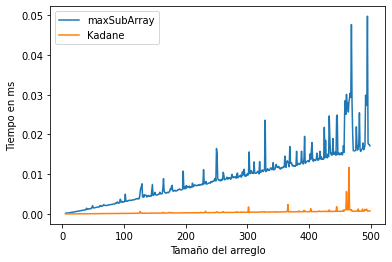

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def Kadane(a,size):
      
    max_so_far = a[0]
    max_ending_here = 0
      
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        if max_ending_here < 0:
            max_ending_here = 0
          
        elif (max_so_far < max_ending_here):
            max_so_far = max_ending_here
              
    return max_so_far

x=[]; y=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(-200, 500), n)
  verbose = False
  posMin = 0
  posMax = len(a)-1

  #la función repeat está ejecutando 20 veces maxSubArray/Kadane con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{posMin}, {posMax},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import Kadane", stmt=f"Kadane({a},{n})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["maxSubArray", "Kadane"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

La diferencia se basa principalmente en los tiempos de ejecución de los algoritmos, ya que el de kadane es de $O(n)$ siendo este lineal, mientras que maxSubArray es de $O(nlog(n))$ siendo claramente mayor (tampoco por mucho si). Y los "puntas" se puede deber al hardware ya que en el caso de maxSubArray no posee un peor o mejor caso teorico.

##MaxSubArray vs Fuerza bruta

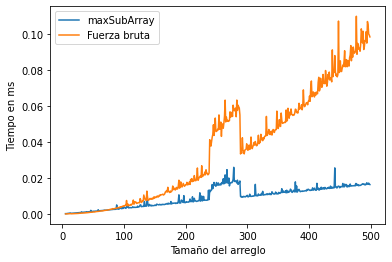

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def max_Summ(a):
    max_sum = 0
    k=0
    for i in a:
        temp_sum = 0
        for j in a[k::]:
            temp_sum=temp_sum+j
            if temp_sum>max_sum:
                max_sum=temp_sum
        k=k+1
    return max_sum

x=[]; y=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(-200, 500), n)
  verbose = False
  posMin = 0
  posMax = len(a)-1

  #la función repeat está ejecutando 20 veces MergeSort/InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{posMin}, {posMax},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import max_Summ", stmt=f"max_Summ({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["maxSubArray", "Fuerza bruta"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede notar una gran diferencia en el aumento que poseen las funciones, esto es debido principalmente a los enfoques que poseen, ya qu en el caso del algoritmo de fuerza bruta, busca la máxima suma recorriendo multiples veces al arreglo completo, buscando distintas combinaciones hasta encontrar una que "sirva" mientras que maxSubArray aplica "divide y vencerás" por lo que divide el problema orignal en problemas más pequeños, sin tener a que llegar a hacer el mismo esfuerzo que el otro.